### IDs:
Insert yours IDs to the cell below

ID #1: 052327558

ID #2: 301833836


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 1% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 75% probability of having at least one defective product in the batch sent?
Write a function that computes this.

### Answer
This is a binomial distribution with n=? and p = 0.01 (probability for a defective product)
$
\\
\\ X ~ Binom(n,p=0.01) 
\\ P(X>=1) = 1 - P(0) = 1 - (1 - p)^n = 0.75
\\ -> n = log_(1-p)(0.25)
$

In [1]:
## imports check in repo if changed
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product

def num_req_samples(prob, defect_prob, k=1):
    samples =  int(np.ceil(math.log(1-prob, 1-defect_prob)))
    return samples
    
samples_required = num_req_samples(0.75, 0.01)
samples_required

138

#### Answer the same question but where:
#### 1.B.1 
Products are 4% defective and we want a 95% probability of at least one defective product in the batch

In [2]:
samples_required = num_req_samples(0.95, 0.04)
samples_required

74

#### 1.B.2
Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch

### Answer
$
P(X>=5) = 1 - P(X<5)
\\ -> 1 - P(X<=4) = 0.9
\\ -> P(X<=4) - 0.1 = 0  (**)
$

We will calculate the cdf with the given parameters while n in the range of (0,1000). 
Then, find the minimum of the absolute value of the equation above (**)

In [3]:
defective_percent = 0.1
prob = 0.9
min_defective_products = 5
n = np.arange(1000)
samples_required = np.argmin(np.abs(stats.binom.cdf(min_defective_products - 1, n, defective_percent) - (1 - prob)))
samples_required


78

#### 1.B.3
Products are 20% defective and we want a 90% probability of at least 10 defective products in the batch

In [4]:
defective_percent = 0.2
prob = 0.9
min_defective_products = 10
n = np.arange(1000)
samples_required = np.argmin(np.abs(stats.binom.cdf(min_defective_products - 1, n, defective_percent) - (1 - prob)))
samples_required


68

#### 1.C
Can you comment on the difference between the answer 1.B.2 and that of 1.B.3?

# What to do here?!?!?!?!?
#### Our intuition is that the answer should be the same, but it's not

### Question 2 - Formula

#### 2.A
Prove (you can use what you learned in class. In particular - linearity of variance for independent random variables):

$$g(n,p) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = np\big(1+p(n-1)\big)$$

$
g(n,p) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = E(K^2) = E(K(K-1)) + E(K)
$

As seen in class for binomial distribution:

$ 
E(K(K-1)) = n(n-1)p^2  
\\ E(K) = np
$

$
-> E(K^2) = E(K(K-1)) + E(K) = np + n(n-1)p^2 = np(1+p(n-1))
$



#### 2.B
Use this formula to compute  (n = 5000, p = 0.1, 0.2, 0.3). What is the complexity of this calculation, in terms of n?

In [5]:
n = 5000
p = np.array([0.1,0.2,0.3])
g = n * p * (1 + p * (n - 1))
g




array([ 250450., 1000800., 2251050.])

# Not sure about this one !!!!!!
### Answer
$
\textbf{Complexity of the calculation:}
\\ np(1+p(n-1)) = np + np^2(n-1) = np + n^2p^2 - np^2 = \mathcal{O}(n^2) 
$

#### 2.C
Consider the function:
$$f(n,p) = \sum_{k=0}^{n} {n \choose k} k^3 p^k (1-p)^{(n-k)}$$

Describe how $f(n,p)$ can be computed using a process that requires a constant number of multiplications and additions, regardless of n.
Use your process to compute the values of $f(n=10000, p=0.05, 0.1, 0.2, 0.3)$ in O(1).<br>
Explain all your steps. 
 

### Answer

# Need to check if this is enough

f(n,p) is the raw third moment of a binomial distribution.
The third moment of a binomial distrinution is:

$
E(K^3) = (n(n-1)(n-2)p^3) + 3(n(n-1)p^2) + np
$

which we will calculate in the cell below





In [6]:
n = 10000
p = np.array([0.05, 0.1, 0.2, 0.3])
third_moment = (n*(n-1)*(n-2)*p**3) + 3*(n*(n-1)*p**2) + n*p
third_moment

array([1.25712928e+08, 1.00270072e+09, 8.00960096e+09, 2.70189008e+10])

### Question 3 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 
The population of SH and RG is 12K and 18K respectively. <br>
Here are some findings of the survey:
* The mean rent in SH and RG is 5100RCU and 3700RCU respectively.
* The median rent is 4000RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 3.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

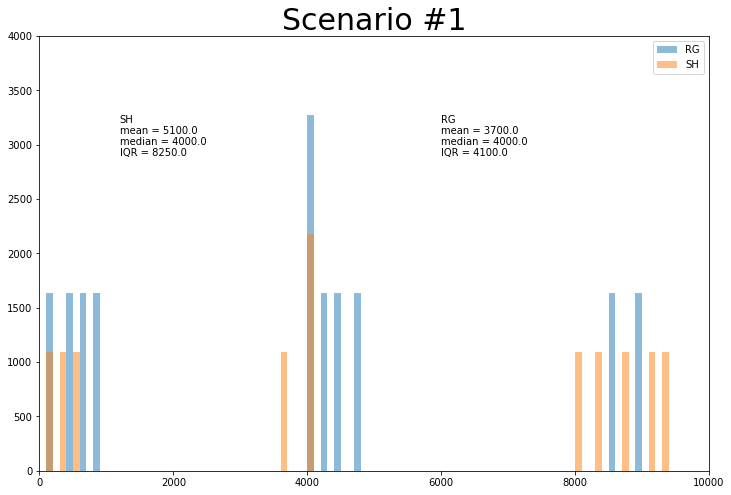

In [7]:
bin_width = 100
rg_pop = 18000
alpha = 0.5
rg = np.array([100,400,600,800,4000,4000,4200,4400,4700,8500,9000] * int(rg_pop/11))
rg_median = np.median(rg)
rg_mean = np.mean(rg)
rg_iqr = np.percentile(rg,75) - np.percentile(rg,25)
plt.figure(figsize=(12,8))
plt.hist(rg, bins=np.arange(min(rg), max(rg) + bin_width, bin_width), label="RG", alpha = alpha)
plt.text(6000,3200, f"RG")
plt.text(6000,3100, f"mean = {rg_mean}")
plt.text(6000,3000, f"median = {rg_median}")
plt.text(6000,2900, f"IQR = {rg_iqr}")

sh_pop = 12000
sh = np.array([100,300,500,3650,4000,4000,8000,8300,8750,9100,9400] * int(sh_pop/11))
sh_median = np.median(sh)
sh_mean = np.mean(sh)
sh_iqr = np.percentile(sh,75) - np.percentile(sh,25)
plt.hist(sh, bins=np.arange(min(sh), max(sh) + bin_width, bin_width), label="SH", alpha = alpha)
plt.text(1200,3200, f"SH")
plt.text(1200,3100, f"mean = {sh_mean}")
plt.text(1200,3000, f"median = {sh_median}")
plt.text(1200,2900, f"IQR = {sh_iqr}")
plt.title("Scenario #1", fontsize=30)
plt.xlim(0,10000)
plt.ylim(0,4000)
plt.legend()


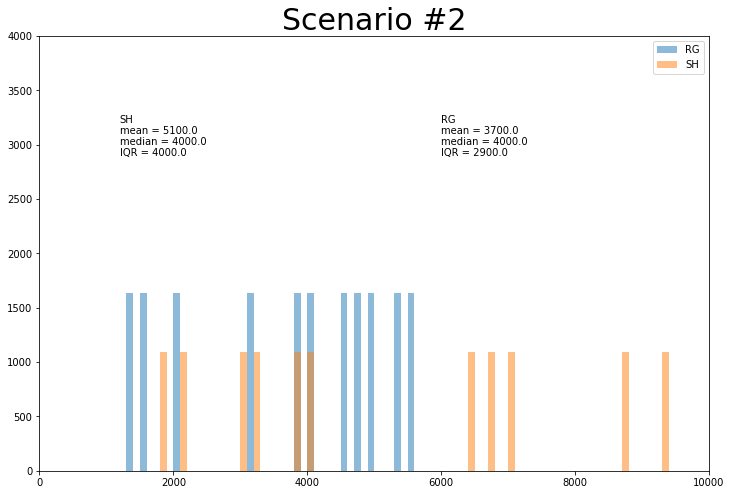

In [8]:
rg = np.array([1300,1500,2000,3100,3800,4000,4500,4700,4900,5300,5600] * int(rg_pop/11))
rg_median = np.median(rg)
rg_mean = np.mean(rg)
rg_iqr = np.percentile(rg,75) - np.percentile(rg,25)
plt.figure(figsize=(12,8))
plt.hist(rg, bins=np.arange(min(rg), max(rg) + bin_width, bin_width), label="RG", alpha = alpha)
plt.text(6000,3200, f"RG")
plt.text(6000,3100, f"mean = {rg_mean}")
plt.text(6000,3000, f"median = {rg_median}")
plt.text(6000,2900, f"IQR = {rg_iqr}")

sh = np.array([1800,2100,3000,3200,3800,4000,6400,6700,7000,8700,9400] * int(sh_pop/11))
sh_median = np.median(sh)
sh_mean = np.mean(sh)
sh_iqr = np.percentile(sh,75) - np.percentile(sh,25)
plt.hist(sh, bins=np.arange(min(sh), max(sh) + bin_width, bin_width), label="SH", alpha = alpha)
plt.text(1200,3200, f"SH")
plt.text(1200,3100, f"mean = {sh_mean}")
plt.text(1200,3000, f"median = {sh_median}")
plt.text(1200,2900, f"IQR = {sh_iqr}")
plt.title("Scenario #2", fontsize=30)
plt.xlim(0,10000)
plt.ylim(0,4000)
plt.legend()

#### 3.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG 

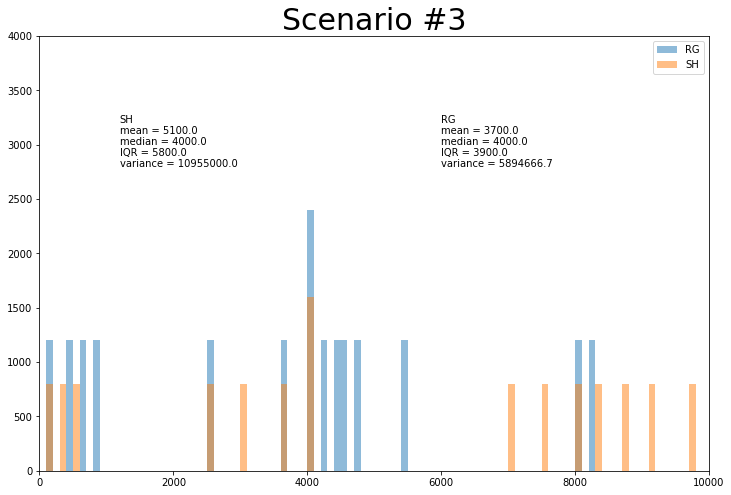

In [9]:
rg = np.array([100,400,600,800,2500,3600,4000,4000,4200,4400,4500,4700,5400,8300,8000] * int(rg_pop/15))
rg_median = np.median(rg)
rg_mean = np.mean(rg)
rg_iqr = np.percentile(rg,75) - np.percentile(rg,25)
rg_var = round(np.var(rg),1)
plt.figure(figsize=(12,8))
plt.hist(rg, bins=np.arange(min(rg), max(rg) + bin_width, bin_width), label="RG", alpha = alpha)
plt.text(6000,3200, f"RG")
plt.text(6000,3100, f"mean = {rg_mean}")
plt.text(6000,3000, f"median = {rg_median}")
plt.text(6000,2900, f"IQR = {rg_iqr}")
plt.text(6000,2800, f"variance = {rg_var}")

sh = np.array([100,300,500,2500,3000,3650,4000,4000,7000,7500,8000,8300,8750,9100,9800] * int(sh_pop/15))
sh_median = np.median(sh)
sh_mean = np.mean(sh)
sh_iqr = np.percentile(sh,75) - np.percentile(sh,25)
sh_var = np.var(sh)
plt.hist(sh, bins=np.arange(min(sh), max(sh) + bin_width, bin_width), label="SH", alpha = alpha)
plt.text(1200,3200, f"SH")
plt.text(1200,3100, f"mean = {sh_mean}")
plt.text(1200,3000, f"median = {sh_median}")
plt.text(1200,2900, f"IQR = {sh_iqr}")
plt.text(1200,2800, f"variance = {sh_var}")
plt.title("Scenario #3", fontsize=30)
plt.xlim(0,10000)
plt.ylim(0,4000)
plt.legend()

The survey also examined the per household income (PHI) in these two places.<br>
It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500
* The median is 12000 in SH and 8000 in RG
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 3.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [21]:
# generate numbers that will give two covariances - one for SH and one for RG. These covariances cannot deviate by more than 1% from each other
alpha = 0.5
rg_rent = np.array([100,400,600,800,4000,4000,4200,4400,4700,8500,9000] * int(rg_pop/11))
rg_rent_median = np.median(rg_rent)
rg_rent_mean = np.mean(rg_rent)

sh_rent = np.array([100,300,500,3650,4000,4000,8000,8300,8750,9100,9400] * int(sh_pop/11))
sh_rent_median = np.median(sh_rent)
sh_rent_mean = np.mean(sh_rent)

rg_alpha = 0.89
rg_phi = np.array([1500,2100,2600,2900,8000,8000,9700,10100,10700,18600,19300] * int(rg_pop/11))
rg_phi_median = np.median(rg_phi)
rg_phi_mean = np.mean(rg_phi)

sh_alpha = 0.97
sh_phi = np.array([5000,6500,7900,11100,12000,12000,14150,15700,16150,17000,20000] * int(sh_pop/11))
sh_phi_median = np.median(sh_phi)
sh_phi_mean = np.mean(sh_phi)

cov_rg = rg_alpha * (np.sqrt(np.var((rg_rent)))) * (np.sqrt(np.var((rg_phi))))
cov_sh = sh_alpha * (np.sqrt(np.var((sh_rent)))) * (np.sqrt(np.var((sh_phi))))
rel_diff = (cov_rg - cov_sh) / cov_rg * 100

print(f"The median rent of sh is {sh_rent_median}")
print(f"The mean rent of sh is {sh_rent_mean}")
print(f"The median phi of sh is {sh_phi_median}")
print(f"The mean phi of sh is {sh_phi_mean}")

print(f"The median rent of rg is {rg_rent_median}")
print(f"The mean rent of rg is {rg_rent_mean}")
print(f"The median phi of rg is {rg_phi_median}")
print(f"The mean phi of rg is {rg_phi_mean}")

print(f"The covariance of sh is {cov_sh}")
print(f"The covariance of rg is {cov_rg}")
print(f"The relative difference between the covariances is: {round(rel_diff,2)}%")



The median rent of sh is 4000.0
The mean rent of sh is 5100.0
The median phi of sh is 12000.0
The mean phi of sh is 12500.0
The median rent of rg is 4000.0
The mean rent of rg is 3700.0
The median phi of rg is 8000.0
The mean phi of rg is 8500.0
The covariance of sh is 15438657.35195434
The covariance of rg is 15449329.874963978
The relative difference between the covariances is: 0.07%


#### 3.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selcted bining resolution.

In [ ]:
# we can do it after we generate the data above

### Question 4 - Covariance and independence

#### 4.A
Define two random variables X and Y over the same probability space so that<br>
* E(X) = the sum of digits of the date you were born on (sum of all in DD/MM/YYYY)
* E(Y) = the sum of the two last digits of your id number

And so that X and Y are:
* NOT correlated (Cov(X,Y) = 0) and NOT independent.

In [26]:
sum_bday_digits = 2 + 4 + 6 + 1 + 9 + 8 + 8
sum_last_two_id = 3 + 6
ratio = sum_bday_digits / sum_last_two_id 
print(sum_bday_digits)
print(sum_last_two_id)

38
9


#### 4.B
Can you define random variables that are independent and so that Cov(X,Y) > 0?<br>
Explain.


### Answer:
No, because the covariance for two independent random variables is zero

$ 
\\ Cov(X,Y) = E[(X-\mu_x)(Y-\mu_y)] = 
\\ = E[XY - X\mu_y - Y\mu_x + \mu_x\mu_y] = 
\\ = E[XY] - E[X\mu_y] - E[Y\mu_x] + E[\mu_x\mu_y] = 
\\ = E[XY] - \mu_yE[X] - \mu_xE[Y] + \mu_x\mu_y = 
\\ = E[XY] - \mu_y\mu_x - \mu_x\mu_y + \mu_x\mu_y = 
\\ = E[XY] - \mu_y\mu_x = [ \text{for independent variables: } E[XY] = E[X]E[Y] = \mu_x\mu_y]
\\ \mu_y\mu_x - \mu_y\mu_x = 0
$

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [27]:
def NFoldConv(P,n):
    # P - pd.DataFrame: Mx2 pandas dataframe that holds the values (vals) and the probability for each value (probs)
    # n - integer of the number of independent repeats
    vals_combs = np.array(list(product(P["vals"], repeat=n)))
    probs_combs = np.array(list(product(P["probs"], repeat=n)))
    final_vals = vals_combs.sum(axis=1)
    final_probs = np.product(probs_combs, axis=1)
    all_combs_probs = pd.DataFrame(np.vstack((final_vals, final_probs)).T, columns=["vals", "probs"])
    Q = all_combs_probs.groupby("vals")["probs"].sum().reset_index()
    return Q

#### 5.B
Compute the distribution of the sum of the results of rolling a fair dice 8 times

Text(0, 0.5, 'Probability')

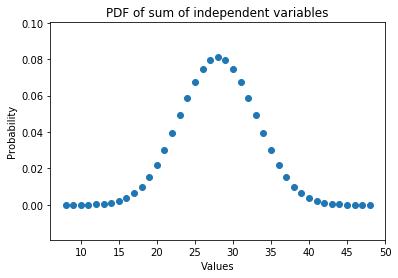

In [37]:
P = pd.DataFrame(np.array([[1, 2, 3, 4, 5, 6], [1/6]*6]).T, columns=["vals", "probs"])
n = 8
Q = NFoldConv(P,n)
plt.scatter(Q["vals"], Q["probs"])
plt.title("PDF of sum of independent variables")
plt.xlabel("Values")
plt.ylabel("Probability")

#### 5.C
Assume that the price of a stock changes in any given day according to (in NIS):
$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.2 & 0.25 & 0.35 & 0.05 & 0.15
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

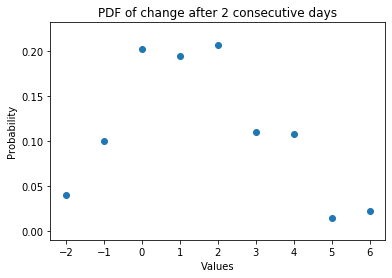

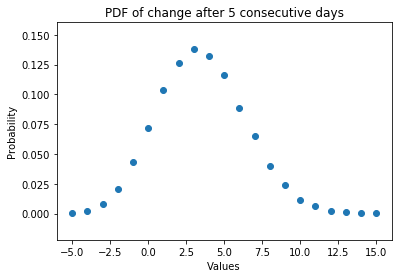

In [43]:
P = pd.DataFrame(np.array([[-1,0,1,2,3], [0.2,0.25,0.35,0.05,0.15]]).T, columns=["vals", "probs"])
N = [2,5]
for n in N:
    Q = NFoldConv(P,n)
    plt.figure()
    plt.scatter(Q["vals"], Q["probs"])
    plt.title(f"PDF of change after {n} consecutive days")
    plt.xlabel("Values")
    plt.ylabel("Probability")

In [52]:
prob_more_than_7 = Q.loc[Q["vals"] > 7, "probs"].sum()
prob_less_than_minus_7 = Q.loc[Q["vals"] < -7, "probs"].sum()
print(f"The probability that the stock has gained stricly more than 7NIS is {round(prob_more_than_7,2)}")
print(f"The probability that the stock has lost stricly more than 7NIS is {prob_less_than_minus_7}")

The probability that the stock has gained stricly more than 7NIS is 0.08
The probability that the stock has lost stricly more than 7NIS is 0.0


### Question 6 - Poisson mode

Let $X\sim{}Poi(Î»)$<br>
#### 6.A
Find the mode of X and prove your calculation.

In [ ]:
## try to look here in the following links:
https://math.stackexchange.com/questions/246496/the-mode-of-the-poisson-distribution
https://math.stackexchange.com/questions/2170489/find-the-mode-of-a-poisson-random-variable



#### 6.B
Plot the pdf of $X$ for $\lambda=4, \lambda=9.3, \lambda=25.8$.<br>
Show the following quantities on your plots:
* The mode of $X$
* The median of $X$
* $\mu(X)$

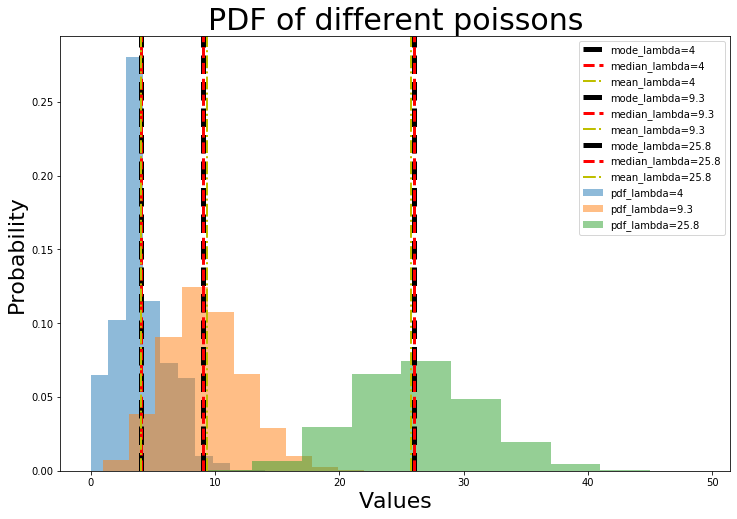

In [78]:
np.random.seed(42)
num_samples = 10000
n_bins = 10
lambdas = (4, 9.3, 25.8)
s = np.random.poisson(lam=lambdas, size=(num_samples, 3))
modes = stats.mode(s, axis=0).mode.flatten()
medians = np.median(s, axis=0)
means = np.average(s, axis=0)
plt.figure(figsize=(12,8))
plt.title(f"PDF of different poissons", fontsize=30)
plt.ylabel("Probability", fontsize=22)
plt.xlabel("Values", fontsize=22)

for i, lamb in enumerate(lambdas):
    plt.hist(s[:,i], n_bins, density=True, label=f"pdf_lambda={lamb}", alpha=0.5)
    plt.axvline(x=modes[i], label = f"mode_lambda={lamb}", color='k', linestyle='--', linewidth=5)
    plt.axvline(x=medians[i], label = f"median_lambda={lamb}", color='r', linestyle='--', linewidth=3)
    plt.axvline(x=means[i], label = f"mean_lambda={lamb}", color='y', linestyle='-.', linewidth=2)
    plt.legend()
